### Importing the Required Packages

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

> ## Crop Analysis

- This study focuses on soybean since it is a very important crop and protein source for human beings, which can be made into oil, bean curd and many other kinds of food
- This is an analysis to quickly look at soybean yield, export/import and price time trends and their correlations  
- It is not supposed to give definitive answers to realistic questions
- In order to achieve an in-depth and more accurate analysis, domain knowledge is required to better understand data,  terminologies and contexts

### 0. Analysis Plan
1. Data Ingestion
2. Data Pre-processing  
3. Exploratory Data Analysis
4. Build, train and define ML models to answer DS questions
5. Conclusions

### 1. Data Ingestion

#### 1.1 Reading and merging the datafiles 
- We have data in three different datasets - soybean, close and nearby storing in three different dataframes of the same names

In [2]:
all = os.listdir(path='C:/Users/himaj/OneDrive/Desktop/usda-wasde-monthly-soybean-projections')
files = [fname for fname in all if 'Soybean' in fname]
files

['USDAProj_Soybean_2007to2008.csv',
 'USDAProj_Soybean_2008to2009.csv',
 'USDAProj_Soybean_2009to2010.csv',
 'USDAProj_Soybean_2010to2011.csv',
 'USDAProj_Soybean_2011to2012.csv',
 'USDAProj_Soybean_2012to2013.csv',
 'USDAProj_Soybean_2013to2014.csv',
 'USDAProj_Soybean_2014to2015.csv',
 'USDAProj_Soybean_2015to2016.csv',
 'USDAProj_Soybean_2016to2017.csv',
 'USDAProj_Soybean_2017to2018.csv']

- Datasets have been loaded as Pandas DataFrame which is a good format ready for data analysis 

In [3]:
soybean = pd.concat([pd.read_csv(f) for f in files], keys=files)
close = pd.read_csv('soybean_JUL14.txt')
nearby = pd.read_csv('soybean_nearby.txt')

#### 1.2 Data Statistics

In [4]:
print('Soybean dataframe shape: ',soybean.shape)
print('Columns in the soybean dataframe:\n', soybean.columns)
soybean.describe().transpose()[:27]

Soybean dataframe shape:  (248, 70)
Columns in the soybean dataframe:
 Index(['Date', 'Area Planted', 'Area Harvested', 'Yield', 'Beginning Stocks',
       'Production', 'Imports', 'Total Supply', 'Crushings', 'Exports', 'Seed',
       'Residual', 'Total Use', 'Ending Stocks', 'World BeginningStocks',
       'World Production', 'World Imports', 'World DomesticCrush',
       'World DomesticTotal', 'World Exports', 'World EndingStocks',
       'United States BeginningStocks', 'United States Production',
       'United States Imports', 'United States DomesticCrush',
       'United States DomesticTotal', 'United States Exports',
       'United States EndingStocks', 'Argentina BeginningStocks',
       'Argentina Production', 'Argentina Imports', 'Argentina DomesticCrush',
       'Argentina DomesticTotal', 'Argentina Exports',
       'Argentina EndingStocks', 'Brazil BeginningStocks', 'Brazil Production',
       'Brazil Imports', 'Brazil DomesticCrush', 'Brazil DomesticTotal',
       'Brazil

,count,mean,std,min,25%,50%,75%,max
Area Planted,248.0,77.907258,5.911153,63.6,75.7000,77.400,82.8250,90.20
Area Harvested,248.0,76.995565,5.967105,62.8,74.6000,76.400,81.9500,89.50
Yield,248.0,44.161290,3.699310,35.3,41.5000,43.500,47.5000,52.50
Beginning Stocks,248.0,217.040323,132.136502,92.0,141.0000,190.500,215.0000,610.00
Production,248.0,3416.201613,514.850522,2585.0,3034.0000,3329.000,3926.2500,4431.00
Imports,248.0,21.616935,15.377913,4.0,13.7500,15.000,25.0000,90.00
Total Supply,248.0,3654.766129,488.889489,2785.0,3260.0000,3495.000,4091.0000,4801.00
Crushings,248.0,1758.770161,107.288138,1500.0,1662.0000,1734.000,1862.5000,1960.00
Exports,248.0,1533.697581,325.901045,975.0,1312.5000,1496.500,1771.2500,2250.00
Seed,248.0,92.612903,5.004791,85.0,89.0000,92.000,95.0000,106.00


In [5]:
soybean.head(3)

Date  Area Planted  Area Harvested  \
USDAProj_Soybean_2007to2008.csv 0  2007/05/11          67.1            66.1   
                                1  2007/06/11          67.1            66.1   
                                2  2007/07/12          64.1            63.3   

                                   Yield  Beginning Stocks  Production  \
USDAProj_Soybean_2007to2008.csv 0   41.5             610.0      2745.0   
                                1   41.5             610.0      2745.0   
                                2   41.5             600.0      2625.0   

                                   Imports  Total Supply  Crushings  Exports  \
USDAProj_Soybean_2007to2008.csv 0      4.0        3359.0     1790.0   1080.0   
                                1      4.0        3359.0     1790.0   1080.0   
                                2      4.0        3229.0     1800.0   1020.0   

                                   ...  Mexico DomesticTotal  Mexico Exports  \
USDAProj_Soybean_2007to2008.csv 0  ...                  0.00             0.0   
                                1  ...                  3.98             0.0   
                                2  ...                  4.05             0.0   

                                   Mexico EndingStocks  \
USDAProj_Soybean_2007to2008.csv 0                 0.00   
                                1                 0.04   
                                2                 0.04   

                                   European Union BeginningStocks  \
USDAProj_Soybean_2007to2008.csv 0                            0.00   
                                1                            1.02   
                                2                            1.02   

                                   European Union Production  \
USDAProj_Soybean_2007to2008.csv 0                       0.00   
                                1                       1.05   
                                2                       1.05   

                                   European Union Imports  \
USDAProj_Soybean_2007to2008.csv 0                    0.00   
                                1                   14.88   
                                2                   14.88   

                                   European Union DomesticCrush  \
USDAProj_Soybean_2007to2008.csv 0                          0.00   
                                1                         14.44   
                                2                         14.44   

                                   European Union DomesticTotal  \
USDAProj_Soybean_2007to2008.csv 0                          0.00   
                                1                         15.89   
                                2                         15.89   

                                   European Union Exports  \
USDAProj_Soybean_2007to2008.csv 0                    0.00   
                                1                    0.05   
                                2                    0.05   

                                   European Union EndingStocks  
USDAProj_Soybean_2007to2008.csv 0                         0.00  
                                1                         1.01  
                                2                         1.01  

[3 rows x 70 columns]

In [6]:
print('Close dataframe shape: ',close.shape)
print('Columns in the close dataframe:\n', close.columns)
print('Close datatypes:\n', close.dtypes)
close.describe().transpose()

Close dataframe shape:  (942, 8)
Columns in the close dataframe:
 Index(['dates', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt',
       'TotalOpenInt'],
      dtype='object')
Close datatypes:
 dates            object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
OpenInt         float64
TotalOpenInt    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
Open,942.0,578.877919,654.777679,0.0,0.0000,0.000,1281.1875,1519.00
High,942.0,1280.105361,80.537812,1054.0,1231.0625,1274.000,1316.8750,1536.75
Low,942.0,1272.766985,75.254512,1054.0,1226.5000,1266.500,1307.9375,1512.25
Close,942.0,1276.552548,77.810938,1054.0,1229.0000,1269.875,1312.0000,1518.75
Volume,942.0,8628.996815,22167.035531,0.0,0.0000,0.000,2154.0000,139658.00
OpenInt,942.0,26586.688960,62124.666353,0.0,3.0000,9.000,11496.2500,313722.00
TotalOpenInt,942.0,595812.430998,138515.805499,0.0,555125.5000,604689.500,645348.2500,838137.00


In [7]:
close.head(5)

,dates,Open,High,Low,Close,Volume,OpenInt,TotalOpenInt
0,2010-11-12,0.0,1093.50,1093.50,1093.50,0.0,0.0,636147.0
1,2010-11-15,0.0,1107.00,1107.00,1107.00,0.0,0.0,636604.0
2,2010-11-16,0.0,1067.00,1067.00,1067.00,0.0,0.0,628018.0
3,2010-11-17,0.0,1054.00,1054.00,1054.00,0.0,0.0,617458.0
4,2010-11-18,0.0,1081.25,1081.25,1081.25,0.0,0.0,612503.0


- From the analysis, soybean crop has a span of 12 years (2007-2018) data whereas close price has just 5 years data(2010 -14).

In [8]:
print('nearby dataframe shape: ',nearby.shape)
print('Columns in the nearby dataframe:\n', nearby.columns)
print('nearby datatypes:\n', nearby.dtypes)
nearby.describe().transpose()

nearby dataframe shape:  (2477, 2)
Columns in the nearby dataframe:
 Index(['dates', 'nearby_close'], dtype='object')
nearby datatypes:
 dates            object
nearby_close    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
nearby_close,2477.0,1166.817017,223.224265,783.5,972.5,1089.5,1367.5,1771.0


In [9]:
nearby.head(5)

,dates,nearby_close
0,2008-02-04,1326.0
1,2008-02-05,1323.0
2,2008-02-06,1318.5
3,2008-02-07,1331.5
4,2008-02-08,1339.0


- From analysis soybean crop has a span of 12 years (2007-18) data whereas close price has just 5 years (10 -14) and nearby price has 10 years (08-17) data

### 2. Data Pre-Processing

#### 2.1 Data cleaning 
- Checking for missing values, duplicate records and invalid formatting especially date formatting

In [10]:
print('Number of missing values in soybean: ', sum(soybean.isna().any(axis=1)))
print('Number of missing values in close: ', sum(close.isna().any(axis=1)))
print('Number of missing values in nearby: ', sum(nearby.isna().any(axis=1)))

Number of missing values in soybean:  0
Number of missing values in close:  0
Number of missing values in nearby:  0


##### 0 indicates no null values in the entire dataset

In [11]:
print('Number of attributes in soybean and number of unique date values: ',soybean.shape[0], len(soybean.Date.unique()))
print('Number of attributes before dropping the dulpicates: ', soybean.shape[0])
soybean.drop_duplicates(inplace=True)
print('Number of attributes after dropping the dulpicates: ', soybean.shape[0])

Number of attributes in soybean and number of unique date values:  248 130
Number of attributes before dropping the dulpicates:  248
Number of attributes after dropping the dulpicates:  248


- Although we have duplicate values in the 'Date' column of soybean df, but values in other columns are different so no duplicate records with identical values for all columns exist. Due to the lack of domain knowledge / background info on why several records of the same date exist and which one is correct, we have to live up with it and might average them out later as the best effort to curate it.

In [12]:
print('Number of attributes before dropping the dulpicates: ', close.shape[0])
close.drop_duplicates(inplace=True)
print('Number of attributes after dropping the dulpicates: ', close.shape[0])

Number of attributes before dropping the dulpicates:  942
Number of attributes after dropping the dulpicates:  942


In [13]:
print('Number of attributes before dropping the dulpicates', nearby.shape[0])
nearby.drop_duplicates(inplace=True)
print('Number of attributes after dropping the dulpicates: ', nearby.shape[0])

Number of attributes before dropping the dulpicates 2477
Number of attributes after dropping the dulpicates:  2477


- No duplicate records in any of the 3 dataframes

In [14]:
# Resetting the dataframe index
soybean.reset_index(drop=True, inplace=True)
soybean.head(2)

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Crushings,Exports,...,Mexico DomesticTotal,Mexico Exports,Mexico EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticCrush,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007/05/11,67.1,66.1,41.5,610.0,2745.0,4.0,3359.0,1790.0,1080.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2007/06/11,67.1,66.1,41.5,610.0,2745.0,4.0,3359.0,1790.0,1080.0,...,3.98,0.0,0.04,1.02,1.05,14.88,14.44,15.89,0.05,1.01


#### 2.2 Data Transformation

In [15]:
# Parsing Date object type into datetime format
soybean.Date = pd.to_datetime(soybean.Date)

# Adding two new columns 'year' and 'month' to the dataframe ( extracted from the original date column) 
# to facilitate the following Exploratory Data analysis
soybean['year'] = soybean.Date.dt.year
soybean['month'] = soybean.Date.dt.month

soybean.loc[:3, ['Date','year','month']]

,Date,year,month
0,2007-05-11,2007,5
1,2007-06-11,2007,6
2,2007-07-12,2007,7
3,2007-08-10,2007,8


In [16]:
soybean.head(2)

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Crushings,Exports,...,Mexico EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticCrush,European Union DomesticTotal,European Union Exports,European Union EndingStocks,year,month
0,2007-05-11,67.1,66.1,41.5,610.0,2745.0,4.0,3359.0,1790.0,1080.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2007,5
1,2007-06-11,67.1,66.1,41.5,610.0,2745.0,4.0,3359.0,1790.0,1080.0,...,0.04,1.02,1.05,14.88,14.44,15.89,0.05,1.01,2007,6


### A few questions can be answered based on the observed data

   
1. What are main factors impacting US Soybean export?
 

2. Which years have similar profiles of US Soybean production, export and import?
 

3. Can we use crop's yield, production, supply, demand and other features to predict market price? 

### 3. Exploratory Data Analysis

#### 3.1 Scatter Plot of US exports vs China imports

Text(0.5, 1.0, 'US Exports vs China Imports')

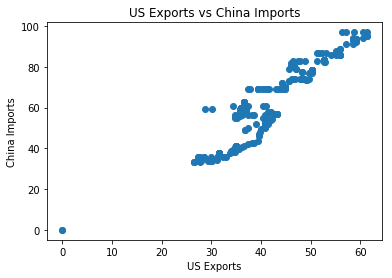

In [17]:
plt.scatter(soybean['United States Exports'], soybean['China Imports'])
plt.xlabel('US Exports')
plt.ylabel('China Imports')
plt.title('US Exports vs China Imports')

- From the graph it is evident that there is a positive correlation between US Exports and China Imports over years

Text(0.5, 1.0, 'US Exports vs Japan Imports')

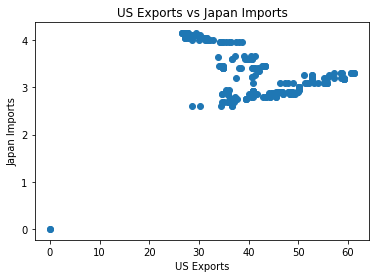

In [18]:
plt.scatter(soybean['United States Exports'], soybean['Japan Imports'])
plt.xlabel('US Exports')
plt.ylabel('Japan Imports')
plt.title('US Exports vs Japan Imports')


- From the plot it can be seen that there is almost no correlation between US exports and Japan imports, which implies, for soybean China is heavily relying on US supply, whereas Japan is independent of US soybean supply

#### 3.2 Yearly trends of soybean yield, growth and harvest areas

In [19]:
# Average over months per year has been used as a common factor for comparision given the data contains different number of months for different years 
soybean_yearly = soybean.groupby('year').mean()
soybean_yearly.drop(axis=1, labels=['month'], inplace=True) #dropping the month column
soybean_yearly.shape

(12, 69)

#### Bar plot of Year vs Yield

Text(0.5, 1.0, 'Soybean Yearly Yield')

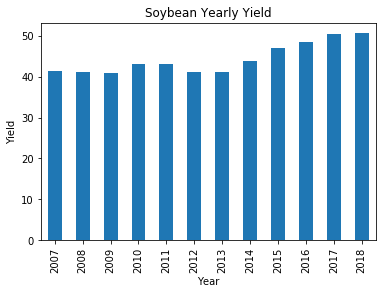

In [20]:
soybean_yearly.Yield.plot(kind='bar',figsize=(6,4))
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Soybean Yearly Yield')

In [21]:
def yearly_trends_1 (df,f1, f2, title):
    linestyle = ['b--','g-s']
    linewidth = 1.8
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    
    plt.plot(df[f1], linestyle[0], linewidth=linewidth, label=f1)
    plt.plot(df[f2], linestyle[1], linewidth=linewidth, label=f2)
    
    plt.xlabel('Year')
    plt.title(title+f1+' & ' +f2)  
    plt.legend(loc='best')
    plt.show()

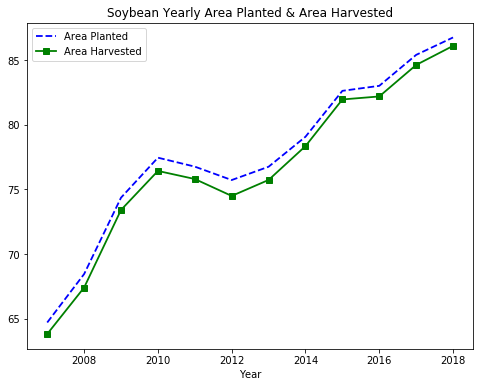

In [22]:
yearly_trends_1(soybean_yearly,'Area Planted','Area Harvested', 'Soybean Yearly ')

##### Area harvested is proportional to the Area planted and slightly less due to various other causes on an yearly basis

In [23]:
def yearly_trends_2 (df,f1,f2,f3,title): 
    linestyle=['r-.','b--','g-*']
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    fig.set_size_inches(8, 6)

    ax.plot(df[f2], linestyle[1], label=f2)
    ax.plot(df[f3], linestyle[2], label=f3)
    ax2.plot(df[f1], linestyle[0],label=f1)

    ax.set_title(title+f1+' vs. '+f2+' & '+f3)
    ax.legend(loc=2)
    ax2.legend(loc=4)
    plt.show()

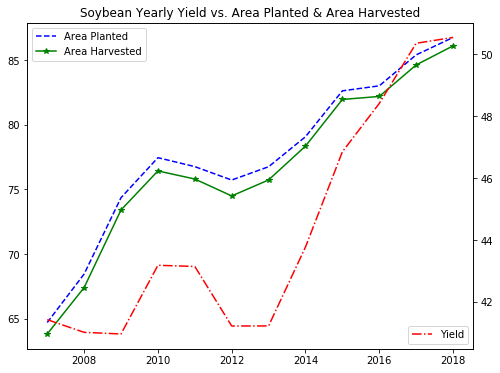

In [24]:
yearly_trends_2(soybean_yearly,'Yield','Area Planted','Area Harvested','Soybean Yearly ')

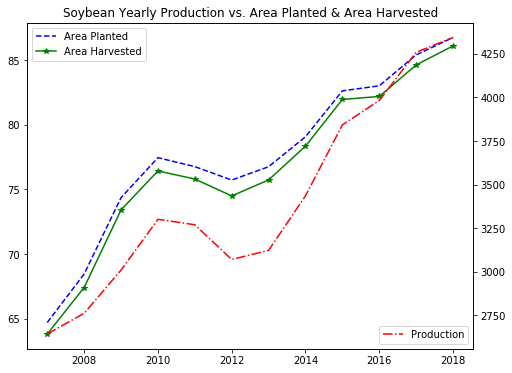

In [25]:
yearly_trends_2(soybean_yearly,'Production','Area Planted','Area Harvested','Soybean Yearly ')

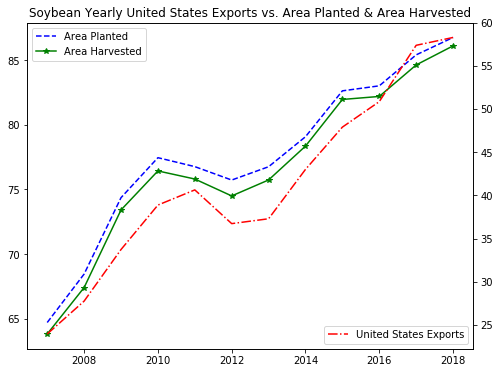

In [26]:
yearly_trends_2(soybean_yearly,'United States Exports','Area Planted','Area Harvested','Soybean Yearly ')

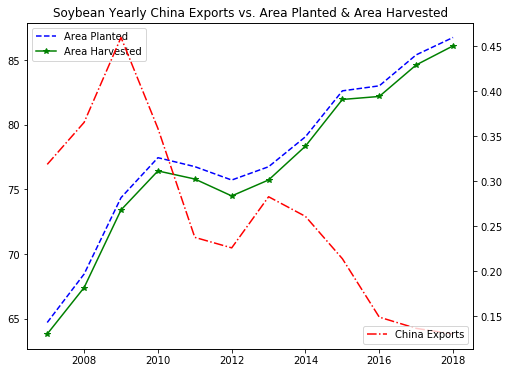

In [27]:
yearly_trends_2(soybean_yearly,'China Exports','Area Planted','Area Harvested','Soybean Yearly ')

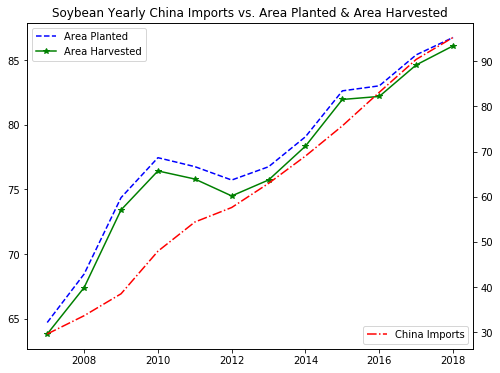

In [28]:
yearly_trends_2(soybean_yearly,'China Imports','Area Planted','Area Harvested','Soybean Yearly ')

##### From the graphs,
- It can be seen that the soybean yield, production and US exports depend on and follows the areas planted & harvested annually
- A sudden drop can be seen in China's soybean export in the year 2009 and in the meantime its soybean import keeps increasing in the last 12 years regardless of the global yield, which implies China has a huge and lasting demand on soybean crop but it now heavily relies on global supply to meet the needs. 

#### 3.3 Monthly trends of soybean yield, grow and harvest areas

In [29]:
soybean_monthly = soybean.groupby(['year','month']).mean()
print('Shape: ',soybean_monthly.shape)
print('Index names: ', soybean_monthly.index.names)
print('Index Levels: ',soybean_monthly.index.levels)
soybean_monthly.head(3) # Indexes based on the year and months

Shape:  (130, 69)
Index names:  ['year', 'month']
Index Levels:  [[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]


Area Planted  Area Harvested  Yield  Beginning Stocks  Production  \
year month                                                                      
2007 5              67.1            66.1   41.5             610.0      2745.0   
     6              67.1            66.1   41.5             610.0      2745.0   
     7              64.1            63.3   41.5             600.0      2625.0   

            Imports  Total Supply  Crushings  Exports  Seed  ...  \
year month                                                   ...   
2007 5          4.0        3359.0     1790.0   1080.0  85.0  ...   
     6          4.0        3359.0     1790.0   1080.0  85.0  ...   
     7          4.0        3229.0     1800.0   1020.0  85.0  ...   

            Mexico DomesticTotal  Mexico Exports  Mexico EndingStocks  \
year month                                                              
2007 5                      0.00             0.0                 0.00   
     6                      3.98             0.0                 0.04   
     7                      4.05             0.0                 0.04   

            European Union BeginningStocks  European Union Production  \
year month                                                              
2007 5                                0.00                       0.00   
     6                                1.02                       1.05   
     7                                1.02                       1.05   

            European Union Imports  European Union DomesticCrush  \
year month                                                         
2007 5                        0.00                          0.00   
     6                       14.88                         14.44   
     7                       14.88                         14.44   

            European Union DomesticTotal  European Union Exports  \
year month                                                         
2007 5                              0.00                    0.00   
     6                             15.89                    0.05   
     7                             15.89                    0.05   

            European Union EndingStocks  
year month                               
2007 5                             0.00  
     6                             1.01  
     7                             1.01  

[3 rows x 69 columns]

In [30]:
def monthly_trends_1 (df,f1,f2,title): 
    color=['b','g']
    marker=['*','s']
    linewidth = 1.8
    fig = plt.gcf()
    fig.set_size_inches(8, 6)

    ax = df[f1].plot(linewidth=linewidth, marker=marker[0], color=color[0])
    df[f2].plot(linewidth=linewidth, marker=marker[1], color=color[1])
    
    dur = np.arange(len(df.index.labels[0])) # [0,....129]
    #print(dur)
    every10sampling = (dur%10 == 0) #boolean vector for filtering, 1/10 sampling rate
    #print(every10sampling)
    lessdur = dur[every10sampling]
    #print(lessdur)
    
    ax.set_xticks(lessdur)
    
    lvv = df.index.get_level_values('year') #for each row, get its corresponding level value (specified by level name) in a multi index (levels) df 
    #print(lvv)
    lesslvv = lvv[every10sampling]
    #print(lesslvv)
    
    ax.set_xticklabels(lesslvv, rotation=45)
    plt.xlabel('Year')
    plt.title(title+f1+' & ' +f2)  
    plt.legend(loc='best')    
    plt.show()

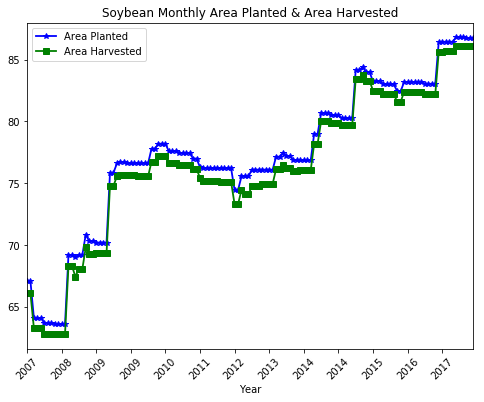

In [31]:
monthly_trends_1(soybean_monthly,'Area Planted','Area Harvested','Soybean Monthly ')

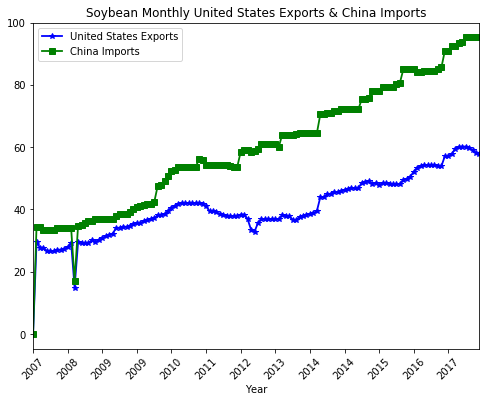

In [32]:
monthly_trends_1(soybean_monthly, 'United States Exports', 'China Imports','Soybean Monthly ')

##### From the graphs, 
- Similar to the yearly trend, the monthly trend of the area harvested is closely coupled with the area planted
- China import is also historically positively correlated to US export trend, but in recent years China's import growth rate is becoming higher than US export increase rate, which implies China also possibly sources its soybean supply from other parts of the world

In [33]:
def monthly_trends_2 (df,f1,f2,f3,title): 
    color=['b','g','r']
    marker=['*','s','d']
    linewidth=1.8
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    fig.set_size_inches(8, 6)

    ax.plot(range(len(df.index)),df[f2], linewidth=linewidth, marker=marker[1],color=color[1], label=f2)
    ax.plot(range(len(df.index)),df[f3], linewidth=linewidth, marker=marker[2],color=color[2], label=f3)
    ax2.plot(range(len(df.index)),df[f1], linewidth=linewidth, marker=marker[0], color=color[0],  label=f1)

    dur = np.arange(len(df.index.labels[0])) # [0,....129]
    #print(dur)
    every10sampling = (dur%10 == 0) #boolean vector for filtering, 1/10 sampling rate
    #print(every10sampling)
    lessdur = dur[every10sampling]
    #print(lessdur)
    
    ax.set_xticks(lessdur)    
    lvv = df.index.get_level_values('year') #for each row, get its corresponding level value (specified by level name) in a multi index (levels) df!  
    #print(lvv)
    lesslvv = lvv[every10sampling]
    #print(lesslvv)
    
    ax.set_xticklabels(lesslvv, rotation=45)
    ax.set_title(title+f1+' vs. '+f2+' & '+f3)
    ax.legend(loc=2)
    ax2.legend(loc=4)
    plt.show()

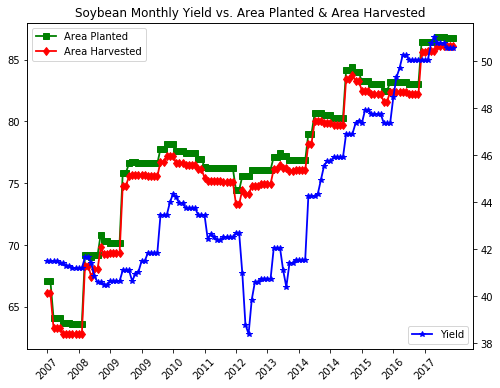

In [34]:
monthly_trends_2(soybean_monthly,'Yield','Area Planted','Area Harvested','Soybean Monthly ')

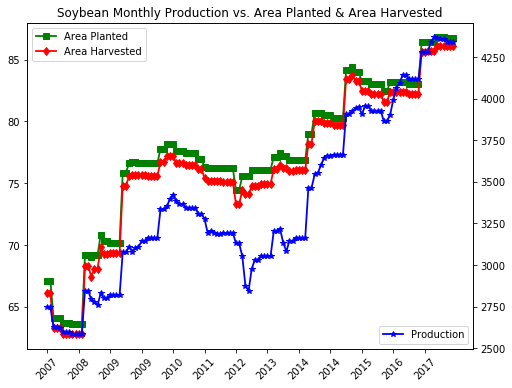

In [35]:
monthly_trends_2(soybean_monthly,'Production','Area Planted','Area Harvested','Soybean Monthly ')

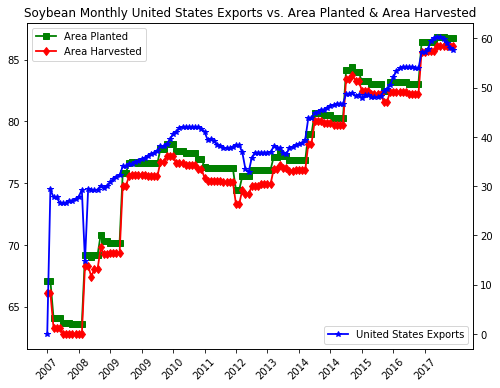

In [36]:
monthly_trends_2(soybean_monthly,'United States Exports','Area Planted','Area Harvested','Soybean Monthly ')

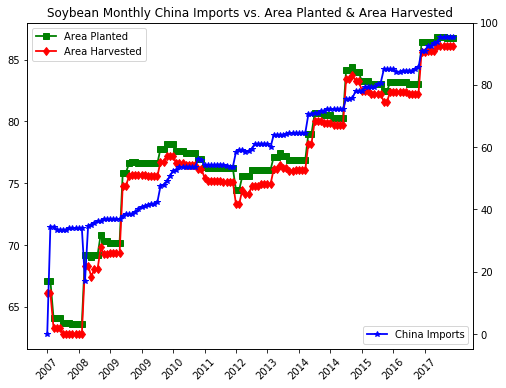

In [37]:
monthly_trends_2(soybean_monthly,'China Imports','Area Planted','Area Harvested','Soybean Monthly ')

##### From the graphs,
- similar to yearly trends, soybean crop yield/production and exports roughly follows area planted & harvested whereas China imports is in stable growth insensitive to the soybean global yield/production. 

#### 3.4 Visualizing the commodity price vs supply and checking if they are indeed in an inversely proportional relationship

In [38]:
#tranform nearby dataset's dates field to datetime and add year and month fields
nearby.dates = pd.to_datetime(nearby.dates)
nearby['year'] = nearby.dates.dt.year
nearby['month']= nearby.dates.dt.month
nearby.head(3)

,dates,nearby_close,year,month
0,2008-02-04,1326.0,2008,2
1,2008-02-05,1323.0,2008,2
2,2008-02-06,1318.5,2008,2


In [39]:
#group and average nearby price per year, month
nearby_monthly = nearby.groupby(['year','month']).mean()
nearby_monthly.head(3)

nearby_close
year month              
2008 2       1356.733333
     3       1323.657895
     4       1313.943182

In [40]:
nearby_monthly.shape

(117, 1)

In [41]:
# Merging two dataframes by index
merged = nearby_monthly.join(soybean_monthly, how = 'inner', lsuffix='_x')
print(nearby_monthly.shape, soybean_monthly.shape,merged.shape)

(117, 1) (130, 69) (116, 70)


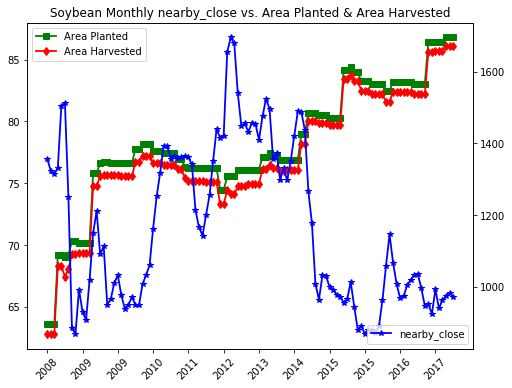

In [42]:
monthly_trends_2(merged, 'nearby_close', 'Area Planted','Area Harvested', 'Soybean Monthly ')

##### From the graph, 
- It can be seen nearby_close price is roughly inversely proportational to area planted & area harvested (which corresponds to yield quantity) - higher the supply, lower the price, and vice versa

In [43]:
#group and average nearby price per year
nearby_yearly = nearby.groupby('year').mean()
nearby_yearly.drop(axis=1,labels=['month'],inplace=True)
nearby_yearly.head(3)

,nearby_close
year,
2008,1300.044304
2009,1031.775194
2010,1049.922481


In [44]:
# merged with soybean yearly data
merged_yearly = nearby_yearly.merge(soybean_yearly, how='inner', left_index=True, right_index=True)
print(nearby_yearly.shape, soybean_yearly.shape, merged_yearly.shape)

(10, 1) (12, 69) (10, 70)


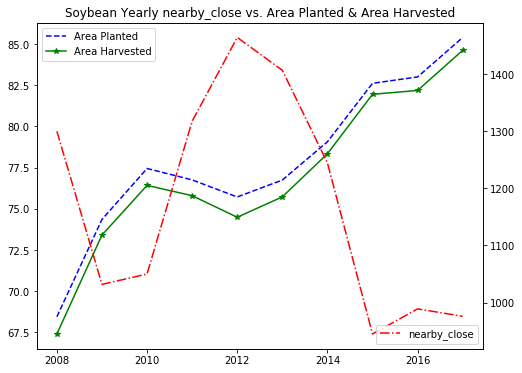

In [45]:
yearly_trends_2(merged_yearly,'nearby_close','Area Planted','Area Harvested','Soybean Yearly ')

##### From the graph,
- When fluctuation is averaged and smoothed out over year, it is clearer to see that market price is indeed in inverse porportation to the growth areas and quantity of supply

### 4. Building and Training Models

#### 4.1 Correlation plots to find the main factors impacting US Soybean export in the history

In [46]:
def corr_plot(ser,y_label,title):  
    color='m'
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.ylabel(y_label)
    plt.title(title)
    
    ax = ser.plot(linewidth=3.3, color=color)
    ax.set_xticks(range(len(ser)))
    ax.set_xticklabels(ser.index,rotation=90)
    plt.show()

In [47]:
top10 = soybean.corr()['United States Exports'].sort_values(ascending=False)[0:11]
top10

United States Exports       1.000000
Exports                     0.963015
United States Production    0.959287
World Exports               0.954879
World Imports               0.951490
World Production            0.938729
China Imports               0.930343
Total Use                   0.924514
China DomesticTotal         0.921327
World DomesticTotal         0.919379
World DomesticCrush         0.916755
Name: United States Exports, dtype: float64

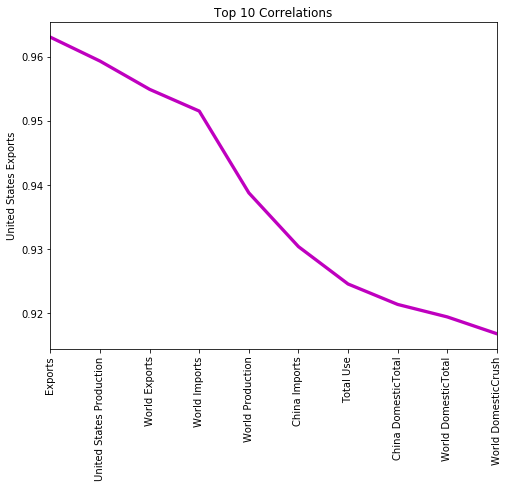

In [48]:
corr_plot(soybean.corr()['United States Exports'].sort_values(ascending=False)[1:11],'United States Exports','Top 10 Correlations')

In [49]:
sub_df = soybean[top10.index]
sub_df.head(2)

,United States Exports,Exports,United States Production,World Exports,World Imports,World Production,China Imports,Total Use,China DomesticTotal,World DomesticTotal,World DomesticCrush
0,0.00,1080.0,0.00,0.00,0.00,0.00,0.0,3039.0,0.0,0.00,0.00
1,29.39,1080.0,74.71,75.53,74.89,225.32,34.5,3039.0,50.0,234.28,203.43


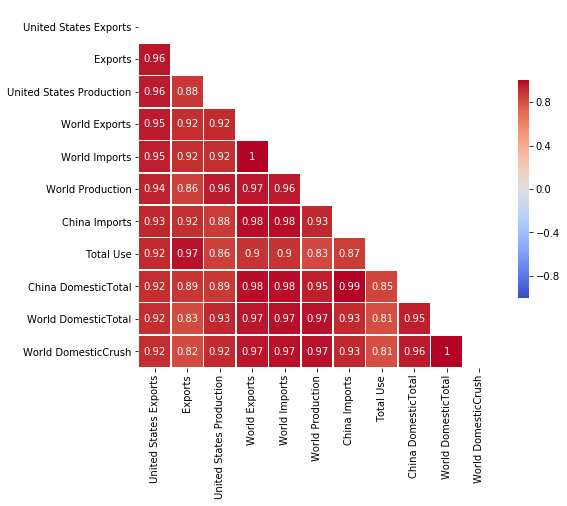

In [50]:
corr = sub_df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, ax = ax, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

#### From the correlation plot, 
1. US soybean exports heavily depends on its own production (obviously) and world exports & imports, which implies a healthy international trade is important to US soybean export prospective
2. US soybean exports are also closely correlated to China imports and domestic consumption, which implies China could be one of the most important buyers of American soybean
3. US soybean exports are relevent to the world domestic demand, which implies US soybean exports to many places in the world

#### 4.2 Feature Selection based on years having similar profiles of US Soybean production, export and import
- KMeans clustering to group similar years together

In [51]:
# Selecting US features from the soybean_yearly dataframe
US = soybean_yearly.columns[soybean_yearly.columns.str.contains('United States')]
US

Index(['United States BeginningStocks', 'United States Production',
       'United States Imports', 'United States DomesticCrush',
       'United States DomesticTotal', 'United States Exports',
       'United States EndingStocks'],
      dtype='object')

In [52]:
#subset a df only containing us soybean columns 
df_us = soybean_yearly[US]
print('Shape of df_us: ', df_us.shape)
df_us.head(2)

Shape of df_us:  (12, 7)


,United States BeginningStocks,United States Production,United States Imports,United States DomesticCrush,United States DomesticTotal,United States Exports,United States EndingStocks
year,,,,,,,
2007,13.8075,62.6000,0.12125,43.18875,47.105,23.95125,5.4750
2008,10.9240,70.9385,0.22300,46.80950,50.062,27.75750,4.2675


#### 4.3 Feature Scaling 
- KMeans Clustering is sensitive to features of different units / magnitudes 

In [53]:
ss = StandardScaler()
X = ss.fit_transform(df_us)
print(df_us.shape, X.shape)

(12, 7) (12, 7)


In [54]:
pd.DataFrame(X, columns=US).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
United States BeginningStocks,12.0,-2.474872e-16,1.044466,-0.904759,-0.668015,-0.374694,0.140219,2.545527
United States Production,12.0,-3.145632e-16,1.044466,-1.788369,-0.536316,-0.154661,0.827264,1.600603
United States Imports,12.0,1.434038e-16,1.044466,-1.429991,-0.748429,-0.150490,0.445321,2.090503
United States DomesticCrush,12.0,8.696747e-16,1.044466,-1.424713,-0.680945,-0.334827,0.866326,1.617432
United States DomesticTotal,12.0,1.665335e-16,1.044466,-1.210089,-0.780340,-0.331280,0.889936,1.687649
United States Exports,12.0,6.846375e-16,1.044466,-1.693163,-0.523780,-0.156606,0.707191,1.644745
United States EndingStocks,12.0,-1.850372e-16,1.044466,-1.028019,-0.763314,-0.433691,0.850076,1.970187


#### 4.4 Building KMeans model with the training data

In [55]:
nc = range(2,11) # range of clusters is from 2 to 10
wsse_list = [] # to store the list of within cluster sum of squared errors
km_list = []

for i in nc:
    km=KMeans(n_clusters=i)
    _ = km.fit(X)
    wsse = km.inertia_
    wsse_list.append(wsse)
    km_list.append(km)
#print(wsse_list)
#print(km_list)   

##### Elbow chart to find the optimal number of clusters

Text(0.5, 1.0, 'Elbow Curve')

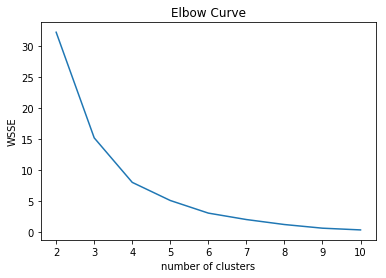

In [56]:
plt.plot(nc,wsse_list)
plt.xlabel('number of clusters')
plt.ylabel('WSSE')
plt.title('Elbow Curve')

- From the elbow curve it can be seen that when number of clusters increased more than 6, there is no much gain in terms of WSSE reduction. So 6 can be chosen 6 as the optimal number of clusters for the final model

In [57]:
final_model = km_list[nc.index(6)]
final_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##### Cluster centroids

In [58]:
uscentroids = final_model.cluster_centers_
print(uscentroids.shape, uscentroids)

(6, 7) [[ 1.55624308 -1.28029693 -1.09844234 -0.23279134 -0.26968909 -1.32295939
  -1.02801853]
 [ 0.14593698  1.53031715  0.30853333  1.58341593  1.61026322  1.600633
   1.7907552 ]
 [-0.47796742 -0.37140305 -0.46988056 -0.67445731 -0.66694098 -0.38052073
  -0.70684652]
 [-0.54952394  0.88537717  1.08513285  1.03489972  1.0433835   0.77893177
   0.85914273]
 [-0.90475937  0.09429209  2.09050337 -0.20684004 -0.49281019  0.15959615
  -0.23503725]
 [ 2.5455273  -1.78836853 -1.42999059 -1.42471337 -1.21008928 -1.69316262
  -0.50250749]]


##### Cluster labels

In [59]:
print('Labels: ', final_model.labels_)
pd.value_counts(final_model.labels_, sort=False)

Labels:  [5 0 2 2 2 2 2 4 3 3 1 1]


0    1
1    2
2    5
3    2
4    1
5    1
dtype: int64

##### Visualising the cluster centroids 

In [60]:
# creating a dataframe of centroids with labels
def centroids_df(names, centroids):
    df = pd.DataFrame(centroids, columns=names)
    df['label'] = df.index
    return df

In [61]:
def draw_parallel(df):
    colors = ['r','y', 'g', 'c', 'b', 'm','k']    
    ax = plt.figure(figsize=(12,9)).gca().axes.set_ylim([-3,+3])
    plt.xticks(rotation=90) 
    parallel_coordinates(df, 'label', color = colors, marker='s')

In [63]:
centroidsDF = centroids_df(US, uscentroids)
centroidsDF

,United States BeginningStocks,United States Production,United States Imports,United States DomesticCrush,United States DomesticTotal,United States Exports,United States EndingStocks,label
0,1.556243,-1.280297,-1.098442,-0.232791,-0.269689,-1.322959,-1.028019,0
1,0.145937,1.530317,0.308533,1.583416,1.610263,1.600633,1.790755,1
2,-0.477967,-0.371403,-0.469881,-0.674457,-0.666941,-0.380521,-0.706847,2
3,-0.549524,0.885377,1.085133,1.034900,1.043384,0.778932,0.859143,3
4,-0.904759,0.094292,2.090503,-0.206840,-0.492810,0.159596,-0.235037,4
5,2.545527,-1.788369,-1.429991,-1.424713,-1.210089,-1.693163,-0.502507,5


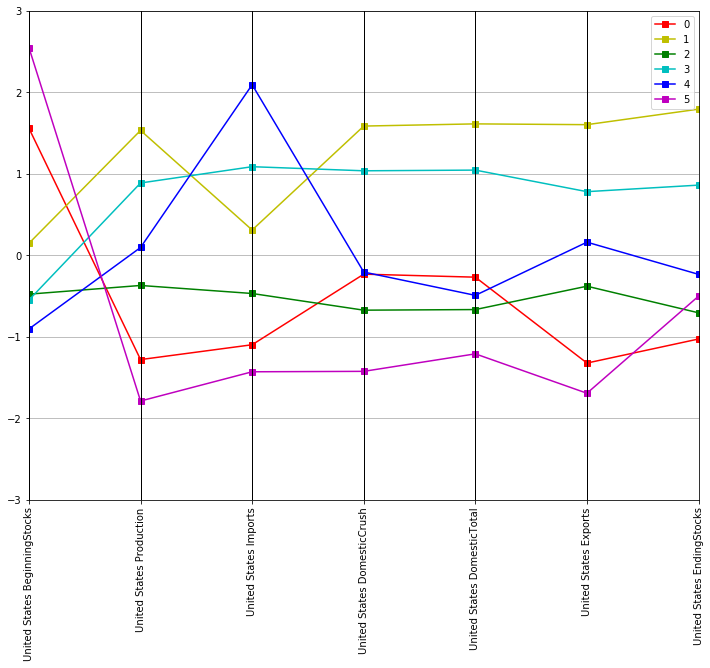

In [64]:
draw_parallel(centroidsDF)

In [65]:
year_label = zip(df_us.index,final_model.labels_)
pd.DataFrame(list(year_label), columns=['Year','Label']).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Label,5,0,2,2,2,2,2,4,3,3,1,1


#### From the Modelling following is the analysis,
- It can be seen groups  (year 2007 to 2008) have very similar profiles 
- The group  (year 2009 to 2013) is quite similar to group (2007 to 2008) except in 'United States Beginning Stocks' 
- The group (year 2015 to 2018) are very similar to each other  
- The group  (year 2014) is an interesting group, similar to group (year 2009 - 2013) in tersm of US DomesticCrush, DomesticTotal, Exports and Ending Stocks and similar to group (year 2015 - 2018)  in terms of US BeginningStocks, Production and Imports. Implies it might be a trasitional year (adjustment period) between two stable patterns 
- Interestingly, that group patterns matches the soybean yearly yield and market price profiles:  

    - 2007 to 08: supply started to increase and price started to drop  
    - 2009 to 13: supply and price were dramatically fluctuating in reverse directions  
    - 2015 to 18: supply was being in constant increase and price keeps decreasing 

#### 4.5 Modelling
- To determine whether we can use crop's yield, production, supply, demand and other features to predict market price
- Supervised Learning - Regression, Decision Trees, Bagging, Random Forests, Gradient Boost, AdaBoost, SVM, Neural Nets are used
- nearby_close is the y/target/dependent variable and all other features are x/independent/predictor variables in the model

In [66]:
data = merged.copy().drop(axis=1, labels=('nearby_close'))
data.head()

Area Planted  Area Harvested  Yield  Beginning Stocks  Production  \
year month                                                                      
2008 2              63.6            62.8  41.20             574.0      2585.0   
     3              63.6            62.8  41.20             574.0      2585.0   
     4              63.6            62.8  41.20             574.0      2585.0   
     5              69.2            68.3  41.65             359.5      2845.0   
     6              69.2            68.3  41.65             349.5      2845.0   

            Imports  Total Supply  Crushings  Exports  Seed  ...  \
year month                                                   ...   
2008 2          6.0        3165.0     1835.0   1005.0  86.0  ...   
     3          6.0        3165.0     1835.0   1025.0  86.0  ...   
     4         10.0        3169.0     1840.0   1075.0  92.0  ...   
     5          9.0        3213.5     1845.0   1070.0  91.0  ...   
     6          9.0        3203.5     1840.0   1080.0  91.0  ...   

            Mexico DomesticTotal  Mexico Exports  Mexico EndingStocks  \
year month                                                              
2008 2                      4.05             0.0                0.040   
     3                      4.05             0.0                0.040   
     4                      4.05             0.0                0.040   
     5                      1.97             0.0                0.015   
     6                      3.84             0.0                0.030   

            European Union BeginningStocks  European Union Production  \
year month                                                              
2008 2                               1.460                      0.840   
     3                               1.460                      0.840   
     4                               1.460                      0.840   
     5                               0.000                      0.000   
     6                               1.015                      0.745   

            European Union Imports  European Union DomesticCrush  \
year month                                                         
2008 2                      15.450                        15.000   
     3                      14.950                        14.500   
     4                      14.950                        14.500   
     5                       0.000                         0.000   
     6                      14.675                        14.125   

            European Union DomesticTotal  European Union Exports  \
year month                                                         
2008 2                            16.440                    0.03   
     3                            15.940                    0.03   
     4                            15.940                    0.03   
     5                             0.000                    0.00   
     6                            15.505                    0.05   

            European Union EndingStocks  
year month                               
2008 2                             1.29  
     3                             1.29  
     4                             1.29  
     5                             0.00  
     6                             0.89  

[5 rows x 69 columns]

In [67]:
labels = merged['nearby_close']
labels.head()

year  month
2008  2        1356.733333
      3        1323.657895
      4        1313.943182
      5        1332.761364
      6        1503.583333
Name: nearby_close, dtype: float64

#### Dividing data into train and test with 80:20 ratio

In [68]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2, random_state=7)

In [69]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(92, 69) (24, 69) (92,) (24,)


### 1. Regression

In [70]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Finding the features most relevant to predict nearby_close price

In [71]:
rel_features = pd.DataFrame(list(zip(data.columns,lm.coef_)),columns=['feature','coef']) # Storing coefficient of each variable along with the variable
rel_features.coef = rel_features.coef.astype(np.float64) # Just the coefficients of the variables
rel_features.head()

,feature,coef
0,Area Planted,-878.705718
1,Area Harvested,969.797910
2,Yield,293.926158
3,Beginning Stocks,191.621257
4,Production,-30.829437


In [72]:
# pandas - sort by absolute value without changing the data
# top 10 most important features for lm model prediction
rel_features.reindex(rel_features.coef.abs().sort_values(ascending=False).index)[:10]

,feature,coef
49,Japan Production,39773.659903
42,China Production,-33340.437496
41,China BeginningStocks,-33286.847913
47,China EndingStocks,33143.875628
45,China DomesticTotal,33129.261832
43,China Imports,-33114.931874
46,China Exports,33044.717695
58,Mexico DomesticCrush,-17961.525077
59,Mexico DomesticTotal,16489.782774
22,United States Imports,-15978.980873


#### Predicting the target price

In [73]:
y_pred = lm.predict(x_test)
print(y_pred.shape, type(y_pred))
print(y_pred)

(24,) <class 'numpy.ndarray'>
[ 831.92243012 1119.6845856  1271.49005835 1126.71882067 1544.50664943
 1120.57770553 1093.61918815 1072.91188719 1056.06153792  972.15021354
  875.97016413  687.12932097 1000.06579071 1049.24678906 1228.11184332
  968.99126204 1279.37512896 1245.05367947 1342.0302119  1216.71085543
  954.93405643  943.43791071  982.78831535 1350.0509452 ]


#### Using RMSE (Root mean squared error) to assess the linear regression model accuracy 

In [74]:
RMSE_lm = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

In [75]:
print('RMSE: ', RMSE_lm,', ','Mean of ytest: ', y_test.mean(),', ','Standard Deviation of ytest: ', y_test.std())

RMSE:  136.27817763842063 ,  Mean of ytest:  1117.9158740942028 ,  Standard Deviation of ytest:  205.36632288795136


#### Visualising how well the trained Linear Regressor predicts target

In [76]:
obs_pred_df_lm = pd.DataFrame({'observed':y_test,'predicted':y_pred})

In [77]:
opdf_lm = obs_pred_df_lm.reset_index()
opdf_lm

,year,month,observed,predicted
0,2017,10,975.068182,831.922430
1,2015,2,992.550000,1119.684586
2,2014,3,1420.654762,1271.490058
3,2014,12,1030.875000,1126.718821
4,2012,10,1539.108696,1544.506649
5,2016,8,1007.836957,1120.577706
6,2008,7,1513.420455,1093.619188
7,2015,3,978.659091,1072.911887
8,2015,5,956.250000,1056.061538
9,2016,11,1003.988636,972.150214


In [78]:
sorted_opdf_lm = opdf_lm.sort_values(['year','month'], ascending=[True,True])
sorted_opdf_lm['year_month']=list(zip(sorted_opdf_lm['year'].values,sorted_opdf_lm['month'].values))
sorted_opdf_lm.reset_index(drop=True, inplace=True)

In [79]:
def plot_pred_vs_obs (df,f1,f2,title): 
    color=['b','g']
    marker=['*','s']
    linewidth = 1.8
    fig = plt.gcf()
    fig.set_size_inches(8, 6)

    ax = df[f1].plot(linewidth=linewidth, marker=marker[0], color=color[0])
    df[f2].plot(linewidth=linewidth, marker=marker[1], color=color[1])

    ax.set_xticks(range(len(df.index)))
    ax.set_ylim([0,1600])

    ax.set_xticklabels(df.year_month, rotation=60)
    
    plt.xlabel('(Year, Month)')
    plt.ylabel('nearby_close')
    plt.title(title+f1+' vs. ' +f2)  
    plt.legend(loc='best')    
    plt.show()

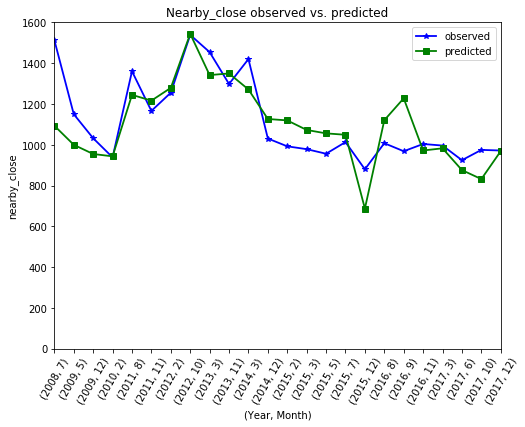

In [80]:
plot_pred_vs_obs(sorted_opdf_lm,'observed','predicted', 'Nearby_close ' )

#### From the graph,
- It can be seen that Linear Regression did not do a bad job of predicting nearby_close price which is close to the actual observed value

### 2. Decision Tree

In [81]:
dt = DecisionTreeRegressor(random_state=123)
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

#### Finding the features most relevant to predict nearby_close price

In [82]:
feature_relevance = pd.Series(dt.feature_importances_, index=data.columns)
#top 10 most important features for Decision Tree model prediction
feature_relevance.sort_values(ascending=False)[:10]

United States DomesticTotal    0.600844
United States EndingStocks     0.171540
Japan Imports                  0.067572
Total Supply                   0.028150
World EndingStocks             0.026411
Brazil BeginningStocks         0.022978
China Exports                  0.013054
Argentina Production           0.011362
China Production               0.009041
Beginning Stocks               0.008077
dtype: float64

#### Using the decision tree trained model to predict nearby_close target

In [83]:
y_pred_dt = dt.predict(x_test)
print(y_pred_dt.shape, type(y_pred_dt))
print(y_pred_dt)

(24,) <class 'numpy.ndarray'>
[ 962.04761905  999.75       1351.3375      999.75       1421.54761905
 1067.55952381 1503.58333333  972.05681818  965.67045455 1019.89772727
  951.88043478  880.42045455 1090.35869565  965.67045455  975.36904762
  962.04761905 1363.67857143 1363.67857143 1458.0125     1143.17857143
 1011.07142857  949.68478261 1036.3625     1372.17857143]


#### Using RMSE to assess the decision tree regression model accuracy 

In [84]:
RMSE_dt = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_dt))
RMSE_dt

45.8537030946599

In [85]:
pd.DataFrame({'Target mean':y_test.mean(),'Target std.':y_test.std(),'Linear regression RMSE':RMSE_lm,'Decision Tree RMSE':RMSE_dt},index=['Compare'])

,Target mean,Target std.,Linear regression RMSE,Decision Tree RMSE
Compare,1117.915874,205.366323,136.278178,45.853703


#### Visualising how well Decision Tree Regressor predicts target

In [86]:
obs_pred_df_dt = pd.DataFrame({'observed':y_test,'predicted':y_pred_dt})
print('Observed vs Predicted values: \n',obs_pred_df_dt.head(3))
opdf_dt = obs_pred_df_dt.reset_index()
print('\nObserved vs Predicted values with index reset: \n',opdf_dt.head(3))
sorted_opdf_dt = opdf_dt.sort_values(['year','month'], ascending=[True,True])
print('\nSorted Observed vs Predicted values with index reset: \n',sorted_opdf_dt.head(3))
sorted_opdf_dt['year_month']=list(zip(sorted_opdf_dt['year'].values,sorted_opdf_dt['month'].values))
print('\nSorted Observed vs Predicted values with index reset and year,month values: \n',sorted_opdf_dt.head(3))
sorted_opdf_dt.reset_index(drop=True, inplace=True)
print('\n Final sorted Observed vs Predicted values with new index reset and year,month values: \n',sorted_opdf_dt.head(3))

Observed vs Predicted values: 
                observed    predicted
year month                          
2017 10      975.068182   962.047619
2015 2       992.550000   999.750000
2014 3      1420.654762  1351.337500

Observed vs Predicted values with index reset: 
    year  month     observed    predicted
0  2017     10   975.068182   962.047619
1  2015      2   992.550000   999.750000
2  2014      3  1420.654762  1351.337500

Sorted Observed vs Predicted values with index reset: 
     year  month     observed    predicted
6   2008      7  1513.420455  1503.583333
12  2009      5  1150.250000  1090.358696
20  2009     12  1032.284091  1011.071429

Sorted Observed vs Predicted values with index reset and year,month values: 
     year  month     observed    predicted  year_month
6   2008      7  1513.420455  1503.583333   (2008, 7)
12  2009      5  1150.250000  1090.358696   (2009, 5)
20  2009     12  1032.284091  1011.071429  (2009, 12)

 Final sorted Observed vs Predicted values with 

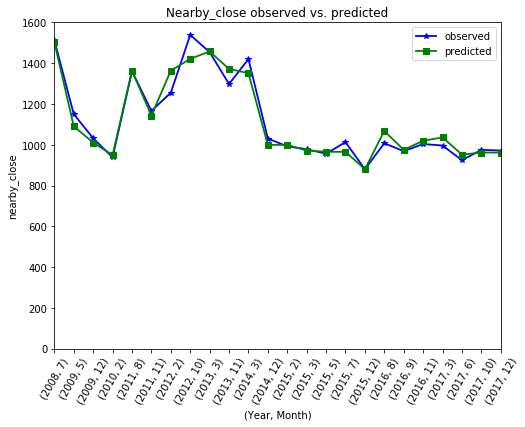

In [87]:
plot_pred_vs_obs(sorted_opdf_dt,'observed','predicted', 'Nearby_close ' )

- When compared with the Linear Regression, Decision Tree regressor did an even better job in predicting nearby_close values based on test set evaluation

### 3. Bagging

In [88]:
bg = BaggingRegressor()
bg.fit(x_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

#### Using the Bagging trained model to predict nearby_close target

In [89]:
y_pred_bg = bg.predict(x_test)
print(y_pred_bg.shape, type(y_pred_bg))
print(y_pred_bg)

(24,) <class 'numpy.ndarray'>
[ 979.3000974   995.04736166 1352.0007684  1006.69406621 1551.48407185
 1129.90868389 1328.17318723  995.04736166  988.79340909  996.60129329
  965.84902103  880.34758658 1120.64699605  980.21093615 1083.35010823
  977.58292396 1364.33739625 1344.79614177 1475.67641234 1230.32748918
  994.34347826  981.8731063  1014.80873024 1407.11705087]


#### Using RMSE to assess the Bagging regression model accuracy 

In [90]:
RMSE_bg = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_bg))
RMSE_bg

66.1630810972084

In [91]:
pd.DataFrame({'Target mean':y_test.mean(),'Target std.':y_test.std(),'Linear regression RMSE':RMSE_lm,'Decision Tree RMSE':RMSE_dt,'Bagging RMSE':RMSE_bg},index=['Compare'])

,Target mean,Target std.,Linear regression RMSE,Decision Tree RMSE,Bagging RMSE
Compare,1117.915874,205.366323,136.278178,45.853703,66.163081


#### Visualising how well Bagging Regressor predicts target

In [92]:
obs_pred_df_bg = pd.DataFrame({'observed':y_test,'predicted':y_pred_bg})
print('Observed vs Predicted values: \n',obs_pred_df_bg.head(3))
opdf_bg = obs_pred_df_bg.reset_index()
#print('\nObserved vs Predicted values with index reset: \n',opdf_dt.head(3))
sorted_opdf_bg = opdf_bg.sort_values(['year','month'], ascending=[True,True])
#print('\nSorted Observed vs Predicted values with index reset: \n',sorted_opdf_dt.head(3))
sorted_opdf_bg['year_month']=list(zip(sorted_opdf_bg['year'].values,sorted_opdf_bg['month'].values))
#print('\nSorted Observed vs Predicted values with index reset and year,month values: \n',sorted_opdf_dt.head(3))
sorted_opdf_bg.reset_index(drop=True, inplace=True)
#print('\n Final sorted Observed vs Predicted values with new index reset and year,month values: \n',sorted_opdf_dt.head(3))

Observed vs Predicted values: 
                observed    predicted
year month                          
2017 10      975.068182   979.300097
2015 2       992.550000   995.047362
2014 3      1420.654762  1352.000768


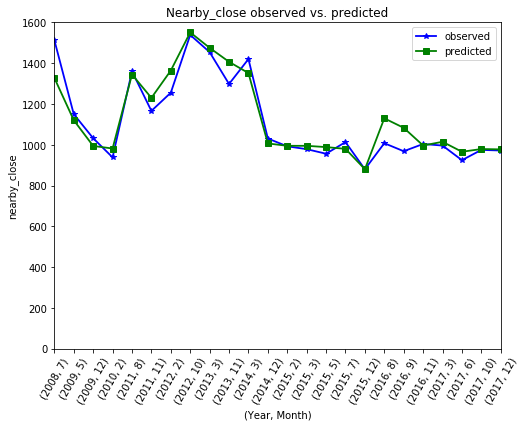

In [93]:
plot_pred_vs_obs(sorted_opdf_bg,'observed','predicted', 'Nearby_close ' )

- Bagging also does a good job in predicting the target variable but not better than Decision Tree

### 4. Random Forest 

In [94]:
rf = RandomForestRegressor(n_estimators=20) # n_estimators is the number of trees in the forest
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Finding the features most relevant to predict nearby_close price

In [95]:
feature_relevance = pd.Series(rf.feature_importances_, index=data.columns)
#top 10 most important features for Decision Tree model prediction
feature_relevance.sort_values(ascending=False)[:10]

United States DomesticTotal    0.490240
Japan BeginningStocks          0.095216
United States EndingStocks     0.081127
Seed                           0.072852
Ending Stocks                  0.030877
Japan Imports                  0.025180
Crushings                      0.015658
Residual                       0.014948
Argentina EndingStocks         0.012593
Japan EndingStocks             0.011130
dtype: float64

#### Using the random forest trained model to predict nearby_close target

In [96]:
y_pred_rf = rf.predict(x_test)
print(y_pred_rf.shape, type(y_pred_rf))
print(y_pred_rf)

(24,) <class 'numpy.ndarray'>
[ 971.5574793   992.73541937 1341.76850379 1008.23857955 1537.75289232
 1068.17330028 1303.75746184  989.59478202  974.96753482 1007.15633117
  975.66685136  876.18371483 1043.15869495  964.32475767 1043.02423431
  979.90365895 1331.60292231 1376.33129905 1453.20796831 1300.15238942
 1133.58616024  974.41112931 1008.68234307 1392.66083627]


#### Using RMSE to assess the random forest regression model accuracy 

In [97]:
RMSE_rf = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_rf))
RMSE_rf

71.14078345527022

In [98]:
pd.DataFrame({'Target mean':y_test.mean(),'Target std.':y_test.std(),'Linear regression RMSE':RMSE_lm,'Decision Tree RMSE':RMSE_dt,'Bagging RMSE':RMSE_bg, 'Random Forest RMSE':RMSE_rf},index=['Compare'])

,Target mean,Target std.,Linear regression RMSE,Decision Tree RMSE,Bagging RMSE,Random Forest RMSE
Compare,1117.915874,205.366323,136.278178,45.853703,66.163081,71.140783


#### Visualising how well Random Forest Regressor predicts target

In [99]:
obs_pred_df_rf = pd.DataFrame({'observed':y_test,'predicted':y_pred_rf})
print('Observed vs Predicted values: \n',obs_pred_df_rf.head(3))
opdf_rf = obs_pred_df_rf.reset_index()
#print('\nObserved vs Predicted values with index reset: \n',opdf_dt.head(3))
sorted_opdf_rf = opdf_rf.sort_values(['year','month'], ascending=[True,True])
#print('\nSorted Observed vs Predicted values with index reset: \n',sorted_opdf_dt.head(3))
sorted_opdf_rf['year_month']=list(zip(sorted_opdf_rf['year'].values,sorted_opdf_rf['month'].values))
#print('\nSorted Observed vs Predicted values with index reset and year,month values: \n',sorted_opdf_dt.head(3))
sorted_opdf_rf.reset_index(drop=True, inplace=True)
#print('\n Final sorted Observed vs Predicted values with new index reset and year,month values: \n',sorted_opdf_dt.head(3))

Observed vs Predicted values: 
                observed    predicted
year month                          
2017 10      975.068182   971.557479
2015 2       992.550000   992.735419
2014 3      1420.654762  1341.768504


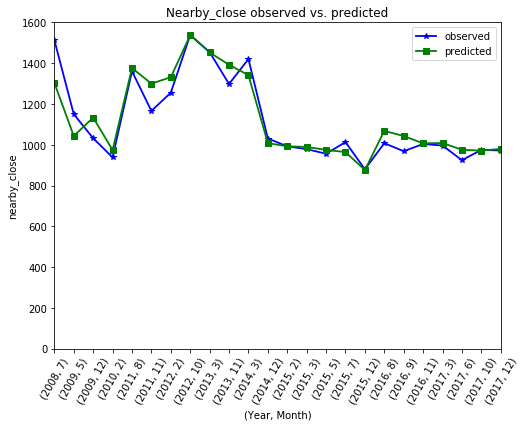

In [100]:
plot_pred_vs_obs(sorted_opdf_rf,'observed','predicted', 'Nearby_close ' )

- When compared with the Random Forest Regressor, Decision Tree regressor did a better job in predicting nearby_close values based on test set evaluation

### 5. Gradient Boosting 

In [101]:
gb = GradientBoostingRegressor(n_estimators=100,max_depth=1, random_state=0) # n_estimators is the number of trees in the forest
gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

#### Finding the features most relevant to predict nearby_close price

In [102]:
feature_relevance = pd.Series(gb.feature_importances_, index=data.columns)
#top 10 most important features for Decision Tree model prediction
feature_relevance.sort_values(ascending=False)[:10]

United States DomesticTotal    0.376800
Japan Imports                  0.133051
Ending Stocks                  0.108511
Japan BeginningStocks          0.099503
Seed                           0.066803
United States EndingStocks     0.051978
Residual                       0.042026
World EndingStocks             0.039914
Total Supply                   0.021261
European Union EndingStocks    0.018448
dtype: float64

#### Using the Gradient Boosting trained model to predict nearby_close target

In [103]:
y_pred_gb = gb.predict(x_test)
print(y_pred_gb.shape, type(y_pred_gb))
print(y_pred_gb)

(24,) <class 'numpy.ndarray'>
[ 926.51656286 1016.5602811  1365.31775158  993.85373725 1497.61108228
 1089.09806782 1245.67140397 1012.52005981  947.63396002  991.40266265
  991.40266265  955.20877498 1064.16472659  947.63396002 1089.09806782
  922.47634158 1252.26885511 1299.88033876 1423.322656   1248.73426143
 1075.46795744  964.00276341  991.40266265 1460.85521085]


#### Using RMSE to assess the Gradient Boosting regression model accuracy 

In [104]:
RMSE_gb = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_gb))
RMSE_gb

83.68196706287377

In [105]:
pd.DataFrame({'Target mean':y_test.mean(),'Target std.':y_test.std(),'Linear regression RMSE':RMSE_lm,'Decision Tree RMSE':RMSE_dt,'Bagging RMSE':RMSE_bg, 'Random Forest RMSE':RMSE_rf,'Gradient Boosting RMSE':RMSE_gb},index=['Compare'])

,Target mean,Target std.,Linear regression RMSE,Decision Tree RMSE,Bagging RMSE,Random Forest RMSE,Gradient Boosting RMSE
Compare,1117.915874,205.366323,136.278178,45.853703,66.163081,71.140783,83.681967


#### Visualising how well Gradient Boosting Regressor predicts target

In [106]:
obs_pred_df_gb = pd.DataFrame({'observed':y_test,'predicted':y_pred_gb})
print('Observed vs Predicted values: \n',obs_pred_df_rf.head(3))
opdf_gb = obs_pred_df_gb.reset_index()
#print('\nObserved vs Predicted values with index reset: \n',opdf_dt.head(3))
sorted_opdf_gb = opdf_gb.sort_values(['year','month'], ascending=[True,True])
#print('\nSorted Observed vs Predicted values with index reset: \n',sorted_opdf_dt.head(3))
sorted_opdf_gb['year_month']=list(zip(sorted_opdf_gb['year'].values,sorted_opdf_gb['month'].values))
#print('\nSorted Observed vs Predicted values with index reset and year,month values: \n',sorted_opdf_dt.head(3))
sorted_opdf_gb.reset_index(drop=True, inplace=True)
#print('\n Final sorted Observed vs Predicted values with new index reset and year,month values: \n',sorted_opdf_dt.head(3))

Observed vs Predicted values: 
                observed    predicted
year month                          
2017 10      975.068182   971.557479
2015 2       992.550000   992.735419
2014 3      1420.654762  1341.768504


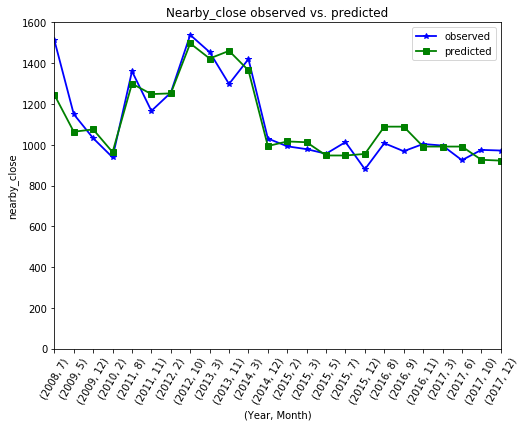

In [107]:
plot_pred_vs_obs(sorted_opdf_gb,'observed','predicted', 'Nearby_close ' )

### 6. AdaBoost 

In [108]:
ab = AdaBoostRegressor(n_estimators=100) # n_estimators is the number of trees in the forest
ab.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)

#### Finding the features most relevant to predict nearby_close price

In [109]:
feature_relevance = pd.Series(ab.feature_importances_, index=data.columns)
#top 10 most important features for Decision Tree model prediction
feature_relevance.sort_values(ascending=False)[:10]

Japan Imports                  0.178699
United States EndingStocks     0.167119
United States DomesticTotal    0.126988
Ending Stocks                  0.075595
Residual                       0.045629
Seed                           0.039586
Mexico Production              0.037491
Japan BeginningStocks          0.036744
European Union EndingStocks    0.028412
European Union Imports         0.027091
dtype: float64

#### Using the Ada Boost trained model to predict nearby_close target

In [110]:
y_pred_ab = ab.predict(x_test)
print(y_pred_ab.shape, type(y_pred_ab))
print(y_pred_ab)

(24,) <class 'numpy.ndarray'>
[ 950.50657422 1016.02612998 1348.37626005 1047.86618828 1492.09619565
 1032.73370796 1332.66828274 1016.02612998  982.83451789  985.07206122
  986.31754735  953.55644463 1101.67934783  966.42981006 1012.96547297
  950.50657422 1198.30576981 1305.07240517 1452.21460568 1196.2181978
 1023.02589669  978.17859273  985.07206122 1432.69952381]


#### Using RMSE to assess the AdaBoost regression model accuracy 

In [111]:
RMSE_ab = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_ab))
RMSE_ab

60.55580538153159

In [112]:
pd.DataFrame({'Target mean':y_test.mean(),'Target std.':y_test.std(),'Linear regression RMSE':RMSE_lm,'Decision Tree RMSE':RMSE_dt,'Bagging RMSE':RMSE_bg,'Random Forest RMSE':RMSE_rf,'AdaBoost RMSE':RMSE_ab},index=['Compare'])

,Target mean,Target std.,Linear regression RMSE,Decision Tree RMSE,Bagging RMSE,Random Forest RMSE,AdaBoost RMSE
Compare,1117.915874,205.366323,136.278178,45.853703,66.163081,71.140783,60.555805


#### Visualising how well Ada Boost Regressor predicts target

In [113]:
obs_pred_df_ab = pd.DataFrame({'observed':y_test,'predicted':y_pred_ab})
print('Observed vs Predicted values: \n',obs_pred_df_ab.head(3))
opdf_ab = obs_pred_df_ab.reset_index()
#print('\nObserved vs Predicted values with index reset: \n',opdf_dt.head(3))
sorted_opdf_ab = opdf_ab.sort_values(['year','month'], ascending=[True,True])
#print('\nSorted Observed vs Predicted values with index reset: \n',sorted_opdf_dt.head(3))
sorted_opdf_ab['year_month']=list(zip(sorted_opdf_ab['year'].values,sorted_opdf_ab['month'].values))
#print('\nSorted Observed vs Predicted values with index reset and year,month values: \n',sorted_opdf_dt.head(3))
sorted_opdf_ab.reset_index(drop=True, inplace=True)
#print('\n Final sorted Observed vs Predicted values with new index reset and year,month values: \n',sorted_opdf_dt.head(3))

Observed vs Predicted values: 
                observed    predicted
year month                          
2017 10      975.068182   950.506574
2015 2       992.550000  1016.026130
2014 3      1420.654762  1348.376260


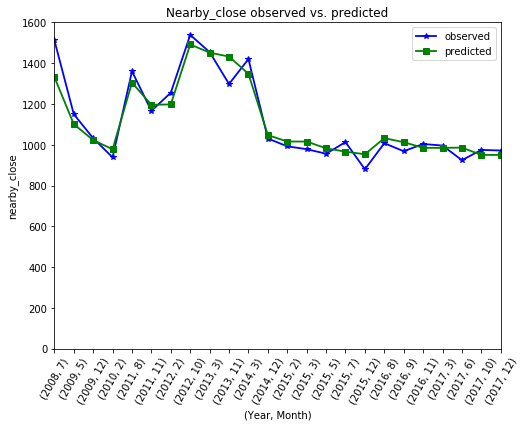

In [114]:
plot_pred_vs_obs(sorted_opdf_ab,'observed','predicted', 'Nearby_close ' )

- Decision tree is still the best

### 7. SVM 

In [115]:
svm = svm.SVR()
svm.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

#### Using the SVM trained model to predict nearby_close target

In [116]:
y_pred_svm = svm.predict(x_test)
print(y_pred_svm.shape, type(y_pred_svm))
print(y_pred_svm)

(24,) <class 'numpy.ndarray'>
[1144.17246069 1144.74998303 1144.86602573 1144.60913255 1144.78679483
 1144.78679483 1144.78689316 1144.74972856 1144.78679408 1143.84526161
 1144.78575601 1143.81100566 1144.78681183 1144.78679483 1144.78679483
 1144.78163663 1146.23857972 1144.79847051 1146.06600331 1144.78678515
 1144.70066429 1144.78499719 1144.69029571 1144.78711749]


#### Using RMSE to assess the SVM regression model accuracy 

In [117]:
RMSE_svm = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_svm))
RMSE_svm

202.59753191527815

In [118]:
pd.DataFrame({'Target mean':y_test.mean(),'Target std.':y_test.std(),'Linear regression RMSE':RMSE_lm,'Decision Tree RMSE':RMSE_dt,'Bagging RMSE':RMSE_bg,'Random Forest RMSE':RMSE_rf,'AdaBoost RMSE':RMSE_ab,'SVM RMSE':RMSE_svm},index=['Compare'])

,Target mean,Target std.,Linear regression RMSE,Decision Tree RMSE,Bagging RMSE,Random Forest RMSE,AdaBoost RMSE,SVM RMSE
Compare,1117.915874,205.366323,136.278178,45.853703,66.163081,71.140783,60.555805,202.597532


#### Visualising how well SVM Regressor predicts target

In [119]:
obs_pred_df_svm = pd.DataFrame({'observed':y_test,'predicted':y_pred_svm})
print('Observed vs Predicted values: \n',obs_pred_df_svm.head(3))
opdf_svm = obs_pred_df_svm.reset_index()
#print('\nObserved vs Predicted values with index reset: \n',opdf_dt.head(3))
sorted_opdf_svm = opdf_svm.sort_values(['year','month'], ascending=[True,True])
#print('\nSorted Observed vs Predicted values with index reset: \n',sorted_opdf_dt.head(3))
sorted_opdf_svm['year_month']=list(zip(sorted_opdf_svm['year'].values,sorted_opdf_svm['month'].values))
#print('\nSorted Observed vs Predicted values with index reset and year,month values: \n',sorted_opdf_dt.head(3))
sorted_opdf_svm.reset_index(drop=True, inplace=True)
#print('\n Final sorted Observed vs Predicted values with new index reset and year,month values: \n',sorted_opdf_dt.head(3))

Observed vs Predicted values: 
                observed    predicted
year month                          
2017 10      975.068182  1144.172461
2015 2       992.550000  1144.749983
2014 3      1420.654762  1144.866026


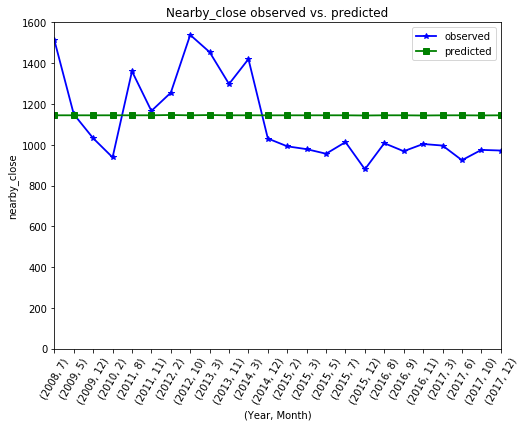

In [120]:
plot_pred_vs_obs(sorted_opdf_svm,'observed','predicted', 'Nearby_close ' )

- svm is the worst working algorithm for this data so far given the very less number of observations in the data

### 8. Neural Nets - Multi Layer Perceptron

In [121]:
nn = MLPRegressor()
nn.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

#### Using the Neural Nets trained model to predict nearby_close target

In [122]:
y_pred_nn = nn.predict(x_test)
print(y_pred_nn.shape, type(y_pred_nn))
print(y_pred_nn)

(24,) <class 'numpy.ndarray'>
[1138.79540449 1164.57615414 1216.49175661 1146.7918506  1173.7774132
 1226.48252595 1342.90016539 1164.46003241 1032.35361054 1162.18305142
 1078.78898785 1154.80379697 1124.85919314 1102.56280477 1233.06171503
 1133.61711021 1073.96805714 1129.74892435 1197.77469582 1115.25328837
 1137.27497312 1162.62540464 1184.77570563 1200.45139341]


#### Using RMSE to assess the Neural Nets regression model accuracy 

In [123]:
RMSE_nn = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_nn))
RMSE_nn

188.48530160240588

In [124]:
pd.DataFrame({'Target mean':y_test.mean(),'Target std.':y_test.std(),'Linear regression RMSE':RMSE_lm,'Decision Tree RMSE':RMSE_dt,'Bagging RMSE':RMSE_bg,'Random Forest RMSE':RMSE_rf,'AdaBoost RMSE':RMSE_ab,'SVM RMSE':RMSE_svm,'Neural Nets RMSE':RMSE_nn},index=['Compare'])

,Target mean,Target std.,Linear regression RMSE,Decision Tree RMSE,Bagging RMSE,Random Forest RMSE,AdaBoost RMSE,SVM RMSE,Neural Nets RMSE
Compare,1117.915874,205.366323,136.278178,45.853703,66.163081,71.140783,60.555805,202.597532,188.485302


#### Visualising how well Neural Nets Regressor predicts target

In [125]:
obs_pred_df_nn = pd.DataFrame({'observed':y_test,'predicted':y_pred_nn})
print('Observed vs Predicted values: \n',obs_pred_df_nn.head(3))
opdf_nn = obs_pred_df_nn.reset_index()
#print('\nObserved vs Predicted values with index reset: \n',opdf_dt.head(3))
sorted_opdf_nn = opdf_nn.sort_values(['year','month'], ascending=[True,True])
#print('\nSorted Observed vs Predicted values with index reset: \n',sorted_opdf_dt.head(3))
sorted_opdf_nn['year_month']=list(zip(sorted_opdf_nn['year'].values,sorted_opdf_nn['month'].values))
#print('\nSorted Observed vs Predicted values with index reset and year,month values: \n',sorted_opdf_dt.head(3))
sorted_opdf_nn.reset_index(drop=True, inplace=True)
#print('\n Final sorted Observed vs Predicted values with new index reset and year,month values: \n',sorted_opdf_dt.head(3))

Observed vs Predicted values: 
                observed    predicted
year month                          
2017 10      975.068182  1138.795404
2015 2       992.550000  1164.576154
2014 3      1420.654762  1216.491757


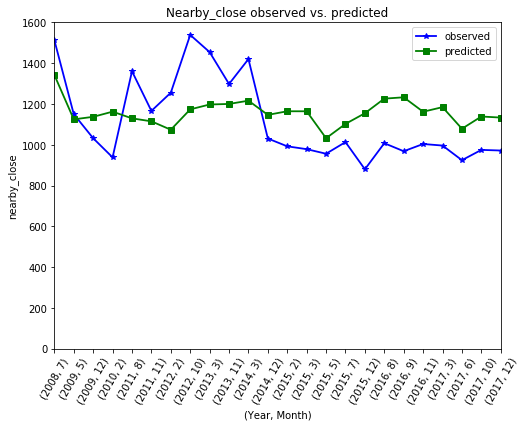

In [126]:
plot_pred_vs_obs(sorted_opdf_nn,'observed','predicted', 'Nearby_close ' )

- Neural Nets perform when the number of observations is very high
- Given the very less number of attributes in our data neural nets is the least performing algorithms

### 5. Conclusions 
- Strong dependencies between soybean yield/production and exports/import is observed, similarly between US soybean export and other countries' import (e.g. China)
- US soybean business has gone through 4 to 6 typical periods,from starting to grow (before 2008), to big flutuations of both yield and prices (2009-2013), to adjustment (2014) and then the stable increasing stage (after 2015)
- It is reliable to use soybean growth areas, yield/productions and export/import profiles to predict the nearby_close market price,  which is of practical value for financial purpose
- Decision Tree Algorithm predicts the target better when compared to all the other algorithms